# PC 3 : Intégration numérique, méthodes de quadrature

**<big> Préparation avant la PC :</big>**

**La question 1 des exercices 1 et 2 sont à préparer** avant la séance de PC du 14/09.

**<big><font color=black><span style="background-color:deepskyblue">Bonus</span></font> après la PC :</big>** 

**Les exercices 1 et 2 contiennent des questions d'implémentation (en bleu) qui peuvent être rendues avant le 18/09 à 20h pour obtenir un <font color=black><span style="background-color:deepskyblue">bonus</span></font> sur la note finale**.

In [1]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np

# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt

# La fonction scipy.integrate.quad donne une approximation d'une integrale par une formule de quadrature
# on l'utilise ici comme une boite noire
from scipy.integrate import quad
# La fonction p_roots permet de calculer les points et poids de la quadrature de Gauss-Legendre
from scipy.special.orthogonal import p_roots
# La fonction scipy.special.sici est utilisee a l'exercice 1
from scipy.special import sici
from scipy.special import roots_legendre, eval_legendre

---

## Exercice 1 : Autour de la méthode des trapèzes

>Dans cet exercice, on considère une fonction continue $f:[a,b]\to\mathbb{R}$, et on note $\left\Vert f\right\Vert_{\infty}=\max\limits_{x\in[a,b]}\left\vert f(x)\right\vert$. Étant donné un entier $n$ strictement positif, on note $a=a_0<a_1<\ldots<a_n=b$ la subdivision régulière de l'intervalle $[a,b]$ donnée par
>
>$$ a_k = a + k\frac{b-a}{n} \qquad{} \forall~k\in\{0,\ldots,n\}, $$
>
>et $I_n(f)$ l'intégrale approchée de $f$ entre $a$ et $b$ calculée à l'aide de la méthode des trapèzes :
>
>$$ I_n(f) = \frac{b-a}{n}\left(\sum_{k=0}^n f(a_k)-\frac{f(a)+f(b)}{2}\right).$$

### Question 1 : Première estimation d'erreur.  

On suppose dans cette question que $f$ est de classe $\mathcal{C}^2$.

1) Soient $x,y\in[a,b]$, $x<y$. Montrer que 

$$ \left\vert \int_x^y f(t) dt - (y-x)\frac{f(x)+f(y)}{2}\right\vert \leq \frac{(y-x)^3}{12} \left\Vert f'' \right\Vert_\infty. $$

*Indication :* On pourra utiliser une estimation d'erreur entre $f$ et son polynôme d'interpolation de Lagrange.

<div class="alert alert-block alert-info">
    On remarque que $(y-x)\frac{f(x)+f(y)}{2} = \int_x^y p_1(f)(t) dt$ où $p_1(f)(t)$ est le polynôme d'interpolation de $f$ de degré $\leq 1$. Alors, on utilise l'estimation (2.4) du poly.
    $$\begin{align}
    \left\vert \int_x^y f(t) dt - (y-x)\frac{f(x)+f(y)}{2}\right\vert &\leq \int_x^y |f(t)- p_1(f)(t)| dt\\
    &= \int_x^y \frac{|\Pi_2(t)| \cdot |f^{''}(z_+)|}{2}dt \\
    &\leq \frac{||f^{''}||_{\infty}}{2} \left( \frac{y-x}{2} \right)^3 \int_{-1}^{+1} (1-u^2) du\\
    &= \frac{||f^{''}||_{\infty}}{2} (y-x)^3
    \end{align}$$
</div>

2) En déduire que 

$$ \left\vert \int_a^b f(t) dt - I_n(f) \right\vert \leq \frac{(b-a)^3}{12 n^2} \left\Vert f'' \right\Vert_\infty. $$

<div class="alert alert-block alert-info">
    On découpe l'intervalle $[a,b]$ pour pouvoir utiliser l'estimation donné dans la question précedente.
    $$\begin{align}
    \left\vert \int_a^b f(t) dt - I_n(f) \right\vert &= \sum_{k=0}^{n-1} \left\vert \int_{a_k}^{a_{k+1}} f(t)dt - \frac{a_{k+1} - a_k}{2}(f(a_{k+1}) - f(a_k)) \right\vert \\
    &= n \frac{1}{12} \left( \frac{b-a}{n} \right)^3 ||f^{''}||_{\infty}\\
    &= \frac{(b-a)^3}{12n^2} ||f^{''}||_{\infty}
    \end{align}$$
</div>

3) **<font color=black><span style="background-color:deepskyblue">Bonus : </span></font>**

a) Implémenter la méthode des trapèzes :
- Construire une fonction qui renvoie $I_n(f)$.
- *Vérifier que votre algorithme renvoie bien la valeur escomptée en intégrant $f(x)=x$ sur $[0,1]$ pour $n=2,3,4$.* 

b) Tester la convergence de la méthode avec la fonction $u : t \mapsto t^3 \ln t$ sur $[1,2]$ : 
- Utiliser ensuite votre algorithme pour calculer de manière approchée l'intégrale de $u : t \mapsto t^3 \ln t$ entre $1$ et $2$. Comparer avec la valeur donnée par la fonction *quad* de *scipy* (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html).
- Tracer en échelle log-log sur le même graphe $\left|\int_a^b f - I_n(f)\right|$ (où $\int_a^b f$ est approché avec *quad* de *scipy*) et $1/n^2$ en fonction de $n$, pour $n = 2, 2^2, ..., 2^{16}$.

In [2]:
def my_trapeze(f, a, b, n):
    """
    calcule l'approximation de l'integrale de f par la méthode des trapezes
    ----------   
    parametre:
    a, b : bornes d'integration
    n    : nombre de points dans la methode d'integration
    
    valeur de retour:
    valeur approchee de l'integrale
    """
    ak = np.zeros(n+1) + a
    for k in range(1, n+1):
        ak[k] = ak[k-1] + (b-a)/n
    sum_f = np.sum(f(ak))
    In_f = (b-a)*(sum_f - (f(a) + f(b))/2.0)/n
    return In_f

<div class="alert alert-block alert-info">
    Alors, on va tester la function en intégrant $f(x)=x$ sur $[0,1]$ pour $n=2,3,4$.
    En faisant les calculs, les résultats attendus sont
    $$\begin{align}
    \begin{cases}
    I_2(f) &= \frac{1}{2}\left( \frac{3}{2} - \frac{0 + 1}{2}\right) = \frac{1}{2} \\
    I_3(f) &= \frac{1}{3}\left( 2 - \frac{0 + 1}{2}\right) = \frac{1}{2} \\
    I_4(f) &= \frac{1}{4}\left( \frac{5}{2} - \frac{0 + 1}{2}\right) = \frac{1}{2}
    \end{cases}
    \end{align}$$
</div>

In [3]:
def f(x):
    return x

#test n=2
assert 0.5 == my_trapeze(f, 0, 1, 2)

#test n=3
assert 0.5 == my_trapeze(f, 0, 1, 3)

#test n=4
assert 0.5 == my_trapeze(f, 0, 1, 4)

In [4]:
def u(x):
    """
    calcule la valeur de u(x)
    ----------   
    parametre:
    x : point ou on evalue u
    
    valeur de retour:
    valeur de u(x)
    """
    return (x**3)*np.log(x)

In [5]:
# Calcul avec scipy.quad
I_u = quad(u, 1, 2)
print(f"Valeur de l'intégrale obtenue par quad de scipy de u entre {1} et {2} : {I_u}")

# Calcul avec methode du trapeze n=500
I_n = my_trapeze(u, 1, 2, 500)
print(f"Valeur de l'intégrale obtenue par la fonction my_trapeze de u entre {1} et {2} : {I_n}")

diff = abs(I_u[0] - I_n)
print(f"erreur pour n=500: {diff}")

Valeur de l'intégrale obtenue par quad de scipy de u entre 1 et 2 : (1.8350887222397811, 2.0373577516605635e-14)
Valeur de l'intégrale obtenue par la fonction my_trapeze de u entre 1 et 2 : 1.8350924948284144
erreur pour n=500: 3.7725886332662384e-06


<div class="alert alert-block alert-info">
    On remarque que la fonction <it>quad</it> rend la valeur de l'intégrale et aussi une estimation de l'erreur. On remarque aussi que l'erreur absolue entre l'estimation de <it>scipy</it> et notre estimation est déjà assez petit pour $n=500$.
</div>

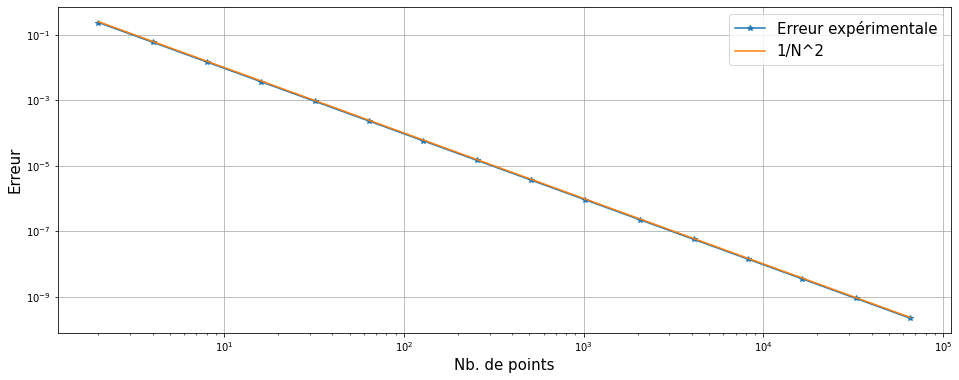

In [6]:
# creation de la liste des nombres de points de quadrature 
N      = 16
list_n = 2**np.arange(1, N+1, dtype='int64')


# Calculer Err_u la liste des erreurs avec la formule des trapèzes
Err_u = np.zeros(len(list_n))
for i in range(len(list_n)):
    estimation_scipy = quad(u, 1, 2)
    Err_u[i] = abs(estimation_scipy[0] - my_trapeze(u, 1, 2, list_n[i]))

# creation d'une figure
fig_u = plt.figure(figsize = (16,6))

# trace la figure
plt.loglog(list_n, Err_u, marker='*', label="Erreur expérimentale")
plt.loglog(list_n, 1/(list_n**2), label="1/N^2")

# nom de l'axe des abscisses
plt.xlabel('Nb. de points', fontsize = 15)
# nom de l'axe des ordonnees
plt.ylabel('Erreur', fontsize = 15)
# taille des légendes
plt.legend(fontsize = 15)
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_u)

<div class="alert alert-block alert-info">
    On constate que dans le cas étudie, le résultat théorique démontré à la question précédente est en accord avec l'erreur observée dans la pratique, puisque les erreurs absolues calculées diminuent au taux de $\frac{1}{n^2}$.
</div>

### Question 2 : Utilisation de la formule d'Euler-Maclaurin :

>Si $f$ est de classe $\mathcal{C}^{2k+2}$, $k\in\mathbb{N}$, la formule d'Euler-Maclaurin nous donne une estimation plus précise:
>
>$$ \int_x^y f(t) dt = (y-x)\frac{f(x)+f(y)}{2} + \sum_{j=1}^k (y-x)^{2j} \frac{b_{2j}}{(2j)!} \left(f^{(2j-1)}(x)-f^{(2j-1)}(y)\right) \quad{}-(y-x)^{2k+3}\frac{b_{2k+2}}{(2k+2)!} f^{(2k+2)}(\xi),$$
>
>où $b_{2j}$ sont les nombres de Bernoulli. On a notamment $b_2=\frac{1}{6}$, $b_4=\frac{-1}{30}$ et $b_6=\frac{1}{42}$.

1) En supposant $f$ de classe $\mathcal{C}^6$, montrer qu'on a

$$ I_n(f) = \int_a^b f(t) dt - \frac{(b-a)^2}{12 n^2} \left(f'(a)-f'(b) \right) + \frac{(b-a)^4}{720 n^4} \left(f^{(3)}(a)-f^{(3)}(b) \right) + O\left(\frac{1}{n^6}\right). $$

<div class="alert alert-block alert-info">
    On découpe l'intervalle et on applique la formule d'Euler-Maclaurin pour retrouver $I_n(f)$.
    $$\begin{align}
        \int_a^b f(t) dt &= \sum_{l=0}^{n-1} \left[ \int_{a_l}^{a_{l+1}} f(t)dt \right]\\
        &= I_n(f) + \sum_{l=0}^{n-1} \left[ \left( \frac{b-a}{n} \right)^2 \cdot \frac{1}{12}(f'(a_{l+1}) - f'(a_l)) - \left( \frac{b-a}{n} \right)^4 \cdot \frac{1}{30 \cdot 4!}(f'''(a_{l+1} - f'''(a_l)) -  \left( \frac{b-a}{n} \right)^7 \cdot \frac{1}{42 \cdot 7!}f^{(6)}(\eta)\right]\\
        &= \int_a^b f(t) dt - \frac{(b-a)^2}{12 n^2} \left(f'(a)-f'(b) \right) + \frac{(b-a)^4}{720 n^4} \left(f^{(3)}(a)-f^{(3)}(b) \right) + O\left(\frac{1}{n^6}\right)
    \end{align}$$
</div>

2) **<font color=black><span style="background-color:deepskyblue">Bonus : </span></font>**

- Appliquer la méthode des trapèzes pour approcher l'intégrale de $v : t\mapsto t^3\ln t - \frac{3+12\ln 2}{2}(t-1)^2$ entre $1$ et $2$.
- Comme à la question 1, étudier la convergence de $I_n$. Commenter. 

In [7]:
def v(x):
    """
    calcule la valeur de v(x)
    ----------   
    parametre:
    x : point ou on evalue v
    
    valeur de retour:
    valeur de v(x)
    """
    return x**3*np.log(x)-(3+12*np.log(2))/2*(x-1)**2

In [8]:
I_v = quad(v, 1, 2)
print(f"Valeur de l'intégrale obtenue par quad de scipy de v entre {1} et {2} : {I_v}")

Valeur de l'intégrale obtenue par quad de scipy de v entre 1 et 2 : (-0.051205638880109344, 1.121141914523012e-15)


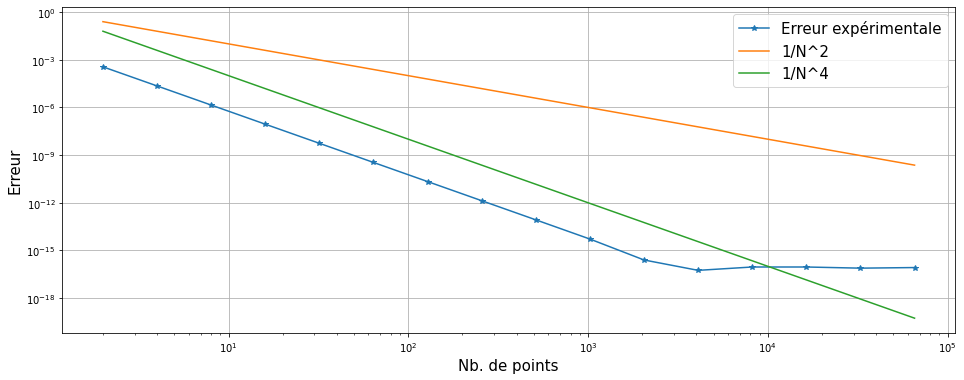

In [9]:
# creation de la grille et calcul des valeurs 
N      = 16
list_n = 2**np.arange(1, N+1, dtype='int64')


# Calculer Err_u la liste des erreurs avec la formule des trapèzes
Err_v = np.zeros(len(list_n))
for i in range(len(list_n)):
    estimation_scipy = quad(v, 1, 2)
    Err_v[i] = abs(estimation_scipy[0] - my_trapeze(v, 1, 2, list_n[i]))

# creation d'une figure
fig_v = plt.figure(figsize = (16,6))

#trace la figure
plt.loglog(list_n, Err_v, marker='*', label="Erreur expérimentale")
plt.loglog(list_n, 1/(1.*list_n)**2, label="1/N^2")
plt.loglog(list_n, 1/(1.*list_n)**4, label="1/N^4")

# nom de l'axe des abscisses
plt.xlabel('Nb. de points', fontsize = 15)
# nom de l'axe des ordonnees
plt.ylabel('Erreur', fontsize = 15)
# taille des légendes
plt.legend(fontsize = 15)
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_v)

**Réponse :** 

<div class="alert alert-block alert-info">
    On constate que dans ce cas, les erreurs absolues calculées ne diminuent pas au taux de $\frac{1}{n^2}$ comme on avait constaté dans l'exercice précédent. On remarque aussi que à partir d'un certain $n$ l'erreur absolue commence à croître, une conséquence de l'erreur de machine. Cependant, dans la section précédant l'apparition de ces erreurs de machine, on constate que l'erreur absolue observée suit la courbe $\frac{1}{n^4}$. En effet, on en conclue que la formule d'Euler-Maclaurin nous donne une estimation plus précise de l'erreur que le résultat précédent.
</div>

### Question 3 : Accélération de convergence, extrapolation de Richardson :

>On suppose dans cette question que $n$ est une puissance de $2$, et que $f$ est de classe $\mathcal{C}^6$.

1) a) Trouver des coefficients $\alpha^{(1)}$ et $\beta^{(1)}$ tels que

$$ R^{(1)}_n(f) := \frac{\alpha^{(1)} I_n(f) - I_{\frac{n}{2}}(f)}{\beta^{(1)}} $$

vérifie 

$$ \left\vert \int_a^b f(t) dt - R^{(1)}_n(f) \right\vert = O\left(\frac{1}{n^4}\right). $$

<div class="alert alert-block alert-info">
    Posons $\alpha^{(1)} = 4$ et $\beta^{(1)} = 3$. Soit $I = \int_a^b f(t) dt$. On considère les développement limité de $I_n(f)$ et $I_{\frac{n}{2}}(f)$.    
    $$\begin{align}
    \begin{cases}
    I_n(f) &= I + \frac{c_1}{n^2} + \frac{c_2}{n^4} + \mathcal{O}\left(\frac{1}{n^6}\right)\\
    I_{\frac{n}{2}}(f) &= I + \frac{4c_1}{n^2} + \frac{16c_2}{n^4} + \mathcal{O}\left(\frac{1}{n^6}\right).
    \end{cases}
    \end{align}$$
    Alors, on a
    $$\begin{align}
    R_n^{(1)}(f) &= \frac{4I_n(f) - I_{\frac{n}{2}}(f)}{3} \\
    &= I + \frac{\tilde{c_3}}{n^4} + \mathcal{O}\left(\frac{1}{n^6}\right).
    \end{align}$$
    Donc, $|I - R_n^{(1)}(f)| = \mathcal{O}\left(\frac{1}{n^4}\right)$.
</div>

b) Trouver ensuite des coefficients $\alpha^{(2)}$ et $\beta^{(2)}$ tels que

$$ R^{(2)}_n(f) := \frac{\alpha^{(2)} R^{(1)}_n(f) - R^{(1)}_{\frac{n}{2}}(f)}{\beta^{(2)}} $$

vérifie

$$ \left\vert \int_a^b f(t) dt - R^{(2)}_n(f) \right\vert = O\left(\frac{1}{n^6}\right). $$

<div class="alert alert-block alert-info">
    Analogiquement, posons $\alpha^{(2)} = 16$ et $\beta^{(2)} = 15$.
    On a 
    $$ R^{(2)}_n(f) := \frac{\alpha^{(2)} R^{(1)}_n(f) - R^{(1)}_{\frac{n}{2}}(f)}{\beta^{(2)}} = I + \frac{\tilde{c3}}{n^4}\left(\frac{16 - 16}{15}\right) + \mathcal{O}\left(\frac{1}{n^6}\right).$$
    Donc, $|I - R_n^{(2)}(f)| = \mathcal{O}\left(\frac{1}{n^6}\right)$.
</div>

2) **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**
- Calculer $R^{(1)}_n$ et $R^{(2)}_n$ pour l'exemple de la fonction $u$ de la question 1. 2).
- Étudier la vitesse de convergence. Commenter.

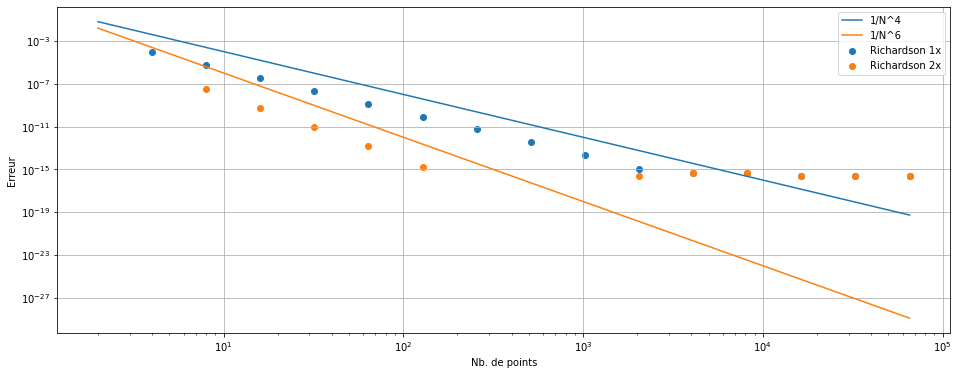

In [10]:
# creation de la grille et calcul des valeurs 
N      = 16
list_n = 2**np.arange(1, N+1, dtype='int64')

#on definit les constants qu'on a trouve pour definir Rn(1) et Rn(2)
alpha_1 = 4
beta_1 = 3
alpha_2 = 16
beta_2 = 15

#on calcule la valuer de l'integrale
estimation_scipy = quad(u, 1, 2)
#on va garder les valeurs de Rn(1) pour calculer Rn(2) avec efficacite
R1_list = np.zeros(len(list_n))
#on calcule en avance l'estimation par la methode du trapeze
In_list = np.zeros(len(list_n))
for i in range(len(list_n + 1)):
    n = list_n[i]
    In_list[i] = my_trapeze(u, 1, 2, n)

# Calculer Err_R1_n et Err_R2_n les listes des erreurs avec les méthodes de Richardson
Err_R1_n = np.zeros(len(list_n))
Err_R2_n = np.zeros(len(list_n))

for i in range(len(list_n)):
    n = list_n[i]
    
    In_u = In_list[i]
    In2_u = In_list[i - 1] if (i>0) else 0
    
    R1_n = (alpha_1*In_u - In2_u)/beta_1
    Err_R1_n[i] = abs(estimation_scipy[0] - R1_n)
    R1_list[i] = R1_n #on garde pour la prochaine iteration
    
    R2_n = (alpha_2*R1_n - R1_list[i-1])/beta_2
    Err_R2_n[i] = abs(estimation_scipy[0] - R2_n)

# creation d'une figure
fig_err = plt.figure(figsize = (16,6))

# trace la figure 
plt.loglog(list_n, 1/(1.*list_n)**4)
plt.loglog(list_n, 1/(1.*list_n)**6)
plt.scatter(list_n[1:], Err_R1_n[1:])
plt.scatter(list_n[2:], Err_R2_n[2:])

# nom de l'axe des abscisses
plt.xlabel('Nb. de points')
# nom de l'axe des ordonnees
plt.ylabel('Erreur')
# legende
plt.legend(["1/N^4","1/N^6","Richardson 1x","Richardson 2x"])
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_err)

>**Remarque :** pour n = 256, n = 512 et n = 1024, l'erreur obtenue pour R2_n est exactement le zéro machine, ce qui explique l'absence de points sur le graphe en échelle log.

**Réponse :** 

<div class="alert alert-block alert-info">
    Nous avons d'abord observé que les erreurs absolues calculées suivent les courbes $\frac{1}{n^4}$ et $\frac{1}{n^6}$ comme prévu. Cependant, après un certain nombre de points, nous constatons que les erreurs commencent à croître et ne suivent plus la tendance souhaitée. Cet écart par rapport au comportement théorique s'explique par l'erreur de la machine impliquée dans le calcul, qui entraîne la perte de chiffres significatifs lorsque $n$ augmente.
</div>

### Question 4 : Méthode de Romberg :

On considère à nouveau la fonction $u$ de la question 1. 2). Obtenir une approximation de l'intégrale la plus précise possible **en évaluant $f$ au maximum 65 fois.** 

*Indication : On pourra itérer le processus d'accélération décrit à la question précédente.*

**Réponse :** 

<div class="alert alert-block alert-info">
    On remarque que $1 + 2 + ... + 32 = 63$. Donc si on calcule $R_n^{(1)}$ et $R_n^{(2)}$ pour $n = 1,2,...,32$. À la fin, on a calculé $f$ un total de $63 + 2 = 65$ fois parce qu'on calcule aussi $f(a)$ et $f(b)$ à la fin de la fonction $\textit{my_trapeze}$.
    On peut juste utiliser la valeur $R_2^{(4)}$ calculé précédement.
</div>

In [11]:
# creation de la grille et calcul des valeurs 
N      = 4
list_n = 2**np.arange(1, N+1, dtype='int64')

#on calcule la valuer de l'integrale
estimation_scipy = quad(u, 1, 2)

# Calculer l'erreur en faisant au plus 65 évaluation de f
R = np.zeros([4,2])
for i in range(4):
    n = list_n[i]
    
    In_u = In_list[i]
    In2_u = In_list[i - 1] if (i>0) else 0
    
    R1_n = (alpha_1*In_u - In2_u)/beta_1
    R2_n = (alpha_2*R1_n - R1_list[i-1])/beta_2
    R[i] = [R1_n, R2_n]

print("Solution :", R[-1,0], "Erreur :", abs(estimation_scipy[0] - R[-1,0]))

Solution : 1.835089074615815 Erreur : 3.523760339074755e-07


---

## Exercice 2 : Polynômes orthogonaux et formules de Gauss
>Soit une fonction poids $w \in C^0(]-1,1[)$ positive et telle que
>
>$$ \int_{-1}^1 \vert x^n\vert w(x)\, dx < \infty \quad{} \forall~n\in\mathbb{N}. $$
>
>On définit le produit scalaire sur $C^0([-1,1])$ et la norme associée 
>
>$$ \left<f,\ g\right>_w = \int_{-1}^{1} g(x) f(x) w(x) \, dx, \qquad{} \left\| f \right\|_w = \sqrt{\left<f, \ f\right>_w}. $$

### Question 1 : Construction des polynômes orthogonaux :

1) a) Montrer que pour toute fonction poids $w$, il existe une suite $(p_n)_{n\in\mathbb{N}}$ de polynômes orthogonaux 

$$ \left<p_n, p_{n'} \right>_w = \alpha_n \delta_{n,n'}, \qquad deg(p_n) = n.$$

b) Montrer que si on choisit les $p_n$ normalisés, c'est-à-dire tels que $\alpha_n = 1$, alors cette suite est unique au signe près.

<div class="alert alert-block alert-info">
    Pour une fonction de poids et un intervalle donnés, nous pouvons créer un ensemble de polynômes orthogonaux en utilisant l'orthogonalisation de Gram Schmidt.
    Alors, soit $\{p_0(x), p_1(x), ..., p_n(x)\}$ une telle suite de polynômes. On remarque que $\mathrm{deg}(p_i) = i \quad \forall i \in \{0,1,...,n\}$.
    Soient $u,v \in \mathbb{R}[x]$ on définit $\mathrm{proj_{u}(v)}$ la projection de $v$ dans l'espace engendré par $\{u\}$.
    Alors
    $$\begin{align}
    p_0(x) &= \sqrt{\alpha_0}\\
    p_1(x) &= \sqrt{\alpha_1} \left(\frac{x - \mathrm{proj}_{1}(x)}{|| x - \mathrm{proj}_{1}(x) ||}\right)\\
    &...\\
    p_n(x) &= \sqrt{\alpha_n} \left(\frac{x^n - \sum_{i=0}^{n-1}\mathrm{proj}_{x^i}(x^n)}{|| x^n - \sum_{i=0}^{n-1}\mathrm{proj}_{x^i}(x^n) ||}\right)
    \end{align}$$
    Comme on s'intéresse au produit scalaire, égal au carré de la norme de chaque $p_i(x)$, on a le choix de signe une fois que le valeur absolu est fixé.
</div>

2) Montrer que les polynômes de Legendre $L_n$ et de Tchebychef $T_n$ définis respectivement par
 
$$L_n(x) = \frac{1}{2^{n} n!}\frac{d^n}{dx^n}\left[(x^2-1)^n \right], \quad{} T_n(x) = \cos(n\arccos(x)) $$

sont orthogonaux pour les poids $w_L(x) = 1$ et $w_T(x) = \frac{1}{\sqrt{1-x^2}}$.

<div class="alert alert-block alert-info">
    <h3>Polynômes de Legendre</h3>
    Montrons que $\left< L_n, L_m \right>_{w_L} = 0$ pour tout $n \not= m$.
    Supposons, sans perte de generalité, $n > m$.
    $$\begin{align}
        \int_{-1}^{+1} L_n(x)L_m(x)dx &= C_{n,m} \int_{-1}^{+1} \frac{d^n}{dx^n}((x^2-1)^n) \frac{d^m}{dx^m}((x^2-1)^m) dx\\
        &= (-1)^n C_{n,m} \int_{-1}^{+1} (x^2 - 1)^n \frac{d^{m+n}}{dx^{n+m}}((x^2-1)^m) dx\\
        &= 0 \quad \text{car $n+m > 2m \implies \frac{d^{m+n}}{dx^{n+m}}((x^2-1)^m) = 0$}
    \end{align}$$
    <h3>Polynômes de Tchebychef</h3>
    Montrons que $\left< T_n, T_m \right>_{w_T} = 0$ pour tout $n \not= m$.
    On utilise le changement de variables $x = \cos(\theta)$. Alors $T_n(\cos(\theta)) = \cos(n\theta)$ et $dx = -\sin(\theta) d\theta = -\sqrt{1-x^2} d\theta$. Donc,
    $$\begin{align}
        \int_{-1}^{+1} T_n(x)T_m(x)\frac{dx}{\sqrt{1-x^2}} &= \int_{0}^{\pi} \cos(n\theta)\cos(m\theta)d\theta\\
        &=\frac{1}{2} \int_{0}^{\pi} [\cos((n+m)\theta) + \cos((n-m)\theta)]d\theta\\
        &=0 \quad \text{dès que $n \not= m$}
    \end{align}$$
</div>

### Question 2 : Quadrature de Gauss-Legendre :

>Pour une famille $(p_n)_{n\in\mathbb{N}}$ de polynômes orthogonaux, les formules de quadrature de Gauss sont données par 
>
>$$ Q(f) = \sum\limits_{i=0}^N w_i f(x_i) $$
>
> où les $x_i$ sont les racines de $p_n$. Les poids $w_i$ sont calculés afin que la méthode soit d'ordre le plus élevé possible, c'est-à-dire afin que la méthode soit exacte pour tout polynôme de degrés $N$ avec $N$ le plus grand possible. On peut montrer que le choix de ces points est optimal en terme d'ordre pour le calcul des intégrales $\left<f,1\right>_w$ pour une fonction poids $w$ donnée. 

1) Calculer les points d'interpolation de Legendre $(x_i)_{i=1,\dots,N}$ pour $N=2$ et $N=3$, c'est-à-dire les racines de $L_2$ et de $L_3$.   

2) Calculer les poids $w_i$ associés pour ces deux familles de points.

3) **<font color=black><span style="background-color:deepskyblue">Bonus : </span></font>**

Implémenter une fonction qui prend en entrée une fonction $f$ et renvoie l'approximation de son intégrale sur $[-1,+1]$ par la quadrature de Gauss-Legendre à 2 points.
De même pour la formule à 3 points. 
Tester ces deux fonctions avec les polynômes $x\mapsto x^i$ et en déduire l'ordre de ces formules.

>**Remarque :** Ce résultat sur l'ordre de la quadrature de Gauss-Legendre se généralise avec les autres familles de polynômes orthogonaux comme ci-après.

In [12]:
roots_2, weights_2 = roots_legendre(2)
print(roots_2)
print(weights_2)
roots_3, weights_3 = roots_legendre(3)
print(roots_3)
print(weights_3)

[-0.57735027  0.57735027]
[1. 1.]
[-0.77459667  0.          0.77459667]
[0.55555556 0.88888889 0.55555556]


<div class="alert alert-block alert-info">
    <h3>Points d'interpolation de Legendre</h3>
    On a $L_2(x) = \frac{3x^2-1}{2} \implies $ les racines sont $x_1 = -\frac{1}{\sqrt{3}}$ et $x_2 = \frac{1}{\sqrt{3}}$. $\\$
    Et $L_3(x) = \frac{x(5x^2 - 3)}{2} \implies $ les racines sont $0, -\sqrt{\frac{3}{5}}, +\sqrt{\frac{3}{5}}$. $\\$
    <h3>Poids associés</h3>
    Le poids $w_i$ associé à la racine $x_i$ de $L_n$ est calculé avec la formule
    $$ w_i = \frac{2}{(1 - x_i)[L'_n(x_i)]^2} $$
</div>

In [13]:
def quad_Legendre2(y1, y2):
    """
    calcule la valeur approchée d'une integrale sur [-1,1] 
    à deux points de quadrature aux points de Legendre 
    ----------   
    parametres :
    y1, y2 : valeurs de la fonction à intégrer aux points de Legendre
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    return weights_2[0]*y1 + weights_2[1]*y2

In [14]:
def quad_Legendre3(y1, y2, y3):
    """
    calcule la valeur approchée d'une integrale sur [-1,1] 
    à trois points de quadrature aux points de Legendre 
    ----------   
    parametres :
    y1, y2, y3 : valeurs de la fonction à intégrer aux points de Legendre
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    return weights_3[0]*y1 + weights_3[1]*y2 + weights_3[2]*y3

In [15]:
# Tester vos fonctions sur des polynômes jusqu'au degrès 6

#p(x) = 1
def p(x):
    return 1
estimation_scipy = quad(p, -1, +1)
print(f'Integrales de p(x) = 1 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
et 3 points: {quad_Legendre3(p(roots_3[0]), p(roots_3[1]), p(roots_3[2]))}')

#p(x) = x
def p(x):
    return x
estimation_scipy = quad(p, -1, +1)
print(f'Integrales de p(x) = x vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
et 3 points: {quad_Legendre3(p(roots_3[0]), p(roots_3[1]), p(roots_3[2]))}') 

#p(x) = x^2
def p(x):
    return x**2
estimation_scipy = quad(p, -1, +1)
print(f'Integrales de p(x) = x^2 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
et 3 points: {quad_Legendre3(p(roots_3[0]), p(roots_3[1]), p(roots_3[2]))}')

#p(x) = x^3
def p(x):
    return x**3
estimation_scipy = quad(p, -1, +1)
print(f'Integrales de p(x) = x^3 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
et 3 points: {quad_Legendre3(p(roots_3[0]), p(roots_3[1]), p(roots_3[2]))}') 

#p(x) = x^4
def p(x):
    return x**4
estimation_scipy = quad(p, -1, +1)
print(f'Integrales de p(x) = x^4 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
et 3 points: {quad_Legendre3(p(roots_3[0]), p(roots_3[1]), p(roots_3[2]))}') 

#p(x) = x^5
def p(x):
    return x**5
estimation_scipy = quad(p, -1, +1)
print(f'Integrales de p(x) = x^5 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
et 3 points: {quad_Legendre3(p(roots_3[0]), p(roots_3[1]), p(roots_3[2]))}') 

#p(x) = x^6
def p(x):
    return x**6
estimation_scipy = quad(p, -1, +1)
print(f'Integrales de p(x) = x^6 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
et 3 points: {quad_Legendre3(p(roots_3[0]), p(roots_3[1]), p(roots_3[2]))}') 

Integrales de p(x) = 1 vaut 2.0 approchée par Gauss-Legendre à 2 points: 2.0  et 3 points: 1.9999999999999996
Integrales de p(x) = x vaut 0.0 approchée par Gauss-Legendre à 2 points: 0.0  et 3 points: 0.0
Integrales de p(x) = x^2 vaut 0.6666666666666666 approchée par Gauss-Legendre à 2 points: 0.6666666666666666  et 3 points: 0.666666666666667
Integrales de p(x) = x^3 vaut 0.0 approchée par Gauss-Legendre à 2 points: 0.0  et 3 points: 0.0
Integrales de p(x) = x^4 vaut 0.4 approchée par Gauss-Legendre à 2 points: 0.22222222222222218  et 3 points: 0.40000000000000013
Integrales de p(x) = x^5 vaut 0.0 approchée par Gauss-Legendre à 2 points: 0.0  et 3 points: 0.0
Integrales de p(x) = x^6 vaut 0.2857142857142857 approchée par Gauss-Legendre à 2 points: 0.07407407407407404  et 3 points: 0.24000000000000013


<div class="alert alert-block alert-info">
    <h3>Ordre des formules</h3>
    On remarque que la formule de Gauss-Legendre à 2 points est exacte jusqu'à $x^3 \implies$ formule de ordre $4$ et la formule de Gauss-Legendre à 3 points est exacte jusqu'à $x^5 \implies$ formule de ordre $6$.
</div>

### Question 3 : Formule composite

On va maintenant décomposer l'intervale d'intégration en $N$ sous-intervales et utiliser la méthode de Gauss-Legendre sur chaque. 

1) **<font color=black><span style="background-color:deepskyblue">Bonus : </span></font>**

a) Construire une fonction qui découpe un intervalle $[a,b]$ en $N$ sous-intervalles et renvoie les deux points de Legendre sur chaque sous-intervalle comme indiqué :

In [16]:
def cut_interval_Legendre2(a, b, N):
    """
    découpe un intervalle en N sous-intervalle et renvoie les points de Legendre sur chaque sous-intervalle
    ----------   
    parametres :
    a, b : bornes de l'intervalle
    N    : nombre de sous-intervalles
    
    valeur de retour :
    x_L2 : matrice contenant les points de Legendre dans chaque sous-intervalle
    
    exemple : x_L2[i,j] est le j-eme point de Legendre du i-eme sous-intervalle
    """
    x_L2 = np.zeros([N, 2])
    left_bound = a
    increment = (b-a)/N
    
    for i in range(N):
        right_bound = left_bound + increment
        d = increment*(1 - 1/np.sqrt(3))/2.0    
        x_L2[i] = [left_bound + d, right_bound - d]
        left_bound += increment #on prepare la prochaine iteration
        
    return x_L2

In [17]:
# tester votre fonction sur [1,2] avec 1, 2 puis 10 sous-intervales
print("[-1,1] 2 pts :", cut_interval_Legendre2(-1, 1, 2))
print("indication   : 1/sqrt(3) = ",1/np.sqrt(3),"\n")
print()
print("[1,2] 2 pts  :", cut_interval_Legendre2( 1, 2, 2),"\n")
print("[1,2] 3 pts  :",cut_interval_Legendre2( 1, 2, 3),"\n")
print("[1,2] 10 pts :",cut_interval_Legendre2( 1, 2, 10))

[-1,1] 2 pts : [[-0.78867513 -0.21132487]
 [ 0.21132487  0.78867513]]
indication   : 1/sqrt(3) =  0.5773502691896258 


[1,2] 2 pts  : [[1.10566243 1.39433757]
 [1.60566243 1.89433757]] 

[1,2] 3 pts  : [[1.07044162 1.26289171]
 [1.40377496 1.59622504]
 [1.73710829 1.92955838]] 

[1,2] 10 pts : [[1.02113249 1.07886751]
 [1.12113249 1.17886751]
 [1.22113249 1.27886751]
 [1.32113249 1.37886751]
 [1.42113249 1.47886751]
 [1.52113249 1.57886751]
 [1.62113249 1.67886751]
 [1.72113249 1.77886751]
 [1.82113249 1.87886751]
 [1.92113249 1.97886751]]


b) Construire une fonction qui calcule la valeur approchée d'une intégrale sur $[a,b]$ en utilisant les quadratures de Gauss-Legendre à 2 points sur $N$ sous intervalles de $[a,b]$.

In [18]:
def quad_N_Legendre2(x_L2, y_L2, a, b):
    """
    calcule la valeur approchée d'une integrale sur [a,b] 
    en utilisant une quadrature de Gauss-Legendre à 2 points sur N sous-intervalles
    ----------   
    parametres :
    x_L2 : matrice contenant les points de Legendre dans chaque sous-intervalle
    y_L2 : matrice contenant la valeur de la fonction à intégrer aux abscisses x_L2
    a, b : bornes de l'intervale d'intégration
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    N = x_L2.shape[0]
    scale_factor = (b-a)/(2*N)
    ans = 0
    for i in range(N):
        ans += quad_Legendre2(y_L2[i][0], y_L2[i][1])
    return ans*scale_factor

In [19]:
# Tester votre fonctions sur des polynômes jusqu'au degrès 6
n = 16

#p(x) = 1
def p(x):
    return 1
estimation_scipy = quad(p, -1, +1)
x_L2 = cut_interval_Legendre2(-1, +1, n)
y_L2 = np.zeros([n, 2])
for i in range(n):
    y_L2[i] = [p(x_L2[i][0]), p(x_L2[i][1])]
print(f'Integrales de p(x) = 1 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
sur {n} sous-intervales: {quad_N_Legendre2(x_L2, y_L2, -1, +1)}')

#p(x) = x
def p(x):
    return x
estimation_scipy = quad(p, -1, +1)
x_L2 = cut_interval_Legendre2(-1, +1, n)
y_L2 = np.zeros([n, 2])
for i in range(n):
    y_L2[i] = [p(x_L2[i][0]), p(x_L2[i][1])]
print(f'Integrales de p(x) = x vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
sur {n} sous-intervales: {quad_N_Legendre2(x_L2, y_L2, -1, +1)}')

#p(x) = x^2
def p(x):
    return x**2
estimation_scipy = quad(p, -1, +1)
x_L2 = cut_interval_Legendre2(-1, +1, n)
y_L2 = np.zeros([n, 2])
for i in range(n):
    y_L2[i] = [p(x_L2[i][0]), p(x_L2[i][1])]
print(f'Integrales de p(x) = x^2 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
sur {n} sous-intervales: {quad_N_Legendre2(x_L2, y_L2, -1, +1)}')

#p(x) = x^3
def p(x):
    return x**3
estimation_scipy = quad(p, -1, +1)
x_L2 = cut_interval_Legendre2(-1, +1, n)
y_L2 = np.zeros([n, 2])
for i in range(n):
    y_L2[i] = [p(x_L2[i][0]), p(x_L2[i][1])]
print(f'Integrales de p(x) = x^3 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
sur {n} sous-intervales: {quad_N_Legendre2(x_L2, y_L2, -1, +1)}')

#p(x) = x^4
def p(x):
    return x**4
estimation_scipy = quad(p, -1, +1)
x_L2 = cut_interval_Legendre2(-1, +1, n)
y_L2 = np.zeros([n, 2])
for i in range(n):
    y_L2[i] = [p(x_L2[i][0]), p(x_L2[i][1])]
print(f'Integrales de p(x) = x^4 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
sur {n} sous-intervales: {quad_N_Legendre2(x_L2, y_L2, -1, +1)}')

#p(x) = x^5
def p(x):
    return x**5
estimation_scipy = quad(p, -1, +1)
x_L2 = cut_interval_Legendre2(-1, +1, n)
y_L2 = np.zeros([n, 2])
for i in range(n):
    y_L2[i] = [p(x_L2[i][0]), p(x_L2[i][1])]
print(f'Integrales de p(x) = x^5 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
sur {n} sous-intervales: {quad_N_Legendre2(x_L2, y_L2, -1, +1)}')

#p(x) = x^6
def p(x):
    return x**6
estimation_scipy = quad(p, -1, +1)
x_L2 = cut_interval_Legendre2(-1, +1, n)
y_L2 = np.zeros([n, 2])
for i in range(n):
    y_L2[i] = [p(x_L2[i][0]), p(x_L2[i][1])]
print(f'Integrales de p(x) = x^6 vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points: {quad_Legendre2(p(roots_2[0]), p(roots_2[1]))}  \
sur {n} sous-intervales: {quad_N_Legendre2(x_L2, y_L2, -1, +1)}')

Integrales de p(x) = 1 vaut 2.0 approchée par Gauss-Legendre à 2 points: 2.0  sur 16 sous-intervales: 2.0
Integrales de p(x) = x vaut 0.0 approchée par Gauss-Legendre à 2 points: 0.0  sur 16 sous-intervales: 0.0
Integrales de p(x) = x^2 vaut 0.6666666666666666 approchée par Gauss-Legendre à 2 points: 0.6666666666666666  sur 16 sous-intervales: 0.6666666666666669
Integrales de p(x) = x^3 vaut 0.0 approchée par Gauss-Legendre à 2 points: 0.0  sur 16 sous-intervales: 0.0
Integrales de p(x) = x^4 vaut 0.4 approchée par Gauss-Legendre à 2 points: 0.22222222222222218  sur 16 sous-intervales: 0.39999728732638884
Integrales de p(x) = x^5 vaut 0.0 approchée par Gauss-Legendre à 2 points: 0.0  sur 16 sous-intervales: -1.3877787807814457e-17
Integrales de p(x) = x^6 vaut 0.2857142857142857 approchée par Gauss-Legendre à 2 points: 0.07407407407407404  sur 16 sous-intervales: 0.28570076271339706


c) Tester cette méthodes de quadrature pour le calcul de l'intégrale $\int_1^2 t^3 \log(t) dt$ définie à l'exercice 2, question 1, 3) avec $N=2, 4$ et $2^5$ sous-intervalles. Tracer la courbe de convergence en fonction du nombre $N$ de sous-intervalles.

In [20]:
# tester votre fonction avec la fonction
estimation_scipy = quad(u, 1, 2)
n_list = np.array([2, 4, 32])
for n in n_list:
    x_L2 = cut_interval_Legendre2(1, 2, n)
    y_L2 = np.zeros([n, 2])
    for i in range(n):
        y_L2[i] = [u(x_L2[i][0]), u(x_L2[i][1])] #on utilise la fonction u(t)
    print(f'Integrales de u(x) vaut {estimation_scipy[0]} \
approchée par Gauss-Legendre à 2 points sur {n} sous-intervales: {quad_N_Legendre2(x_L2, y_L2, 1, 2)}')

Integrales de u(x) vaut 1.8350887222397811 approchée par Gauss-Legendre à 2 points sur 2 sous-intervales: 1.8350290469726884
Integrales de u(x) vaut 1.8350887222397811 approchée par Gauss-Legendre à 2 points sur 4 sous-intervales: 1.8350849696517344
Integrales de u(x) vaut 1.8350887222397811 approchée par Gauss-Legendre à 2 points sur 32 sous-intervales: 1.8350887213217053


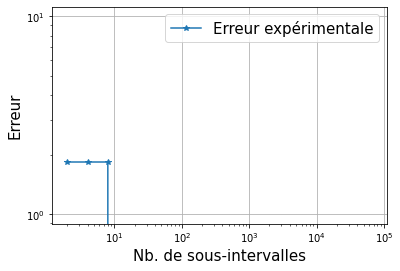

In [27]:
# tracer la courbe de convergence en fonction de N en échelle log
estimation_scipy = quad(u, 1, 2)

# creation de la grille et calcul des valeurs 
N      = 16
list_n = 2**np.arange(1, N+1, dtype='int64')
Err_q = np.zeros(N)

for i in range(len(n_list)):
    n = n_list[i]
    x_L2 = cut_interval_Legendre2(1, 2, n)
    y_L2 = np.zeros([n, 2])
    Err_q[i] = abs(estimation_scipy[0] - quad_N_Legendre2(x_L2, y_L2, 1, 2))

plt.figure()
# trace la figure
plt.loglog(list_n, Err_q, marker='*', label="Erreur expérimentale")
# nom de l'axe des abscisses
plt.xlabel('Nb. de sous-intervalles', fontsize = 15)
# nom de l'axe des ordonnees
plt.ylabel('Erreur', fontsize = 15)
# taille des légendes
plt.legend(fontsize = 15)
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show()

<div class="alert alert-block alert-info">
    On constate que la convergence est très rapide. L'erreur est négligeable pour $N \geq 16$.
</div>